In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('chronic_kidney_disease_full.csv')

In [4]:
data.head()

,id,'age','bp','al','bgr','bu','hemo','pcv','rbcc','htn','dm','appet','pe','class'
0,1,48,80,1,121,36,15.4,44,5.2,yes,yes,good,no,ckd
1,2,7,50,4,,18,11.3,38,,no,no,good,no,ckd
2,3,62,80,2,423,53,9.6,31,,no,yes,poor,no,ckd
3,4,48,70,4,117,56,11.2,32,3.9,yes,no,poor,yes,ckd
4,5,51,80,2,106,26,11.6,35,4.6,no,no,good,no,ckd


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
id         400 non-null int64
'age'      400 non-null object
'bp'       399 non-null object
'al'       400 non-null object
'bgr'      400 non-null object
'bu'       400 non-null object
'hemo'     400 non-null object
'pcv'      400 non-null object
'rbcc'     400 non-null object
'htn'      400 non-null object
'dm'       400 non-null object
'appet'    400 non-null object
'pe'       400 non-null object
'class'    400 non-null object
dtypes: int64(1), object(13)
memory usage: 43.8+ KB


## Mengganti nama kolom

In [8]:
data.columns = data.columns.str.replace("'",'')
#remove id
del data['id']
column = data.columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
age      400 non-null object
bp       399 non-null object
al       400 non-null object
bgr      400 non-null object
bu       400 non-null object
hemo     400 non-null object
pcv      400 non-null object
rbcc     400 non-null object
htn      400 non-null object
dm       400 non-null object
appet    400 non-null object
pe       400 non-null object
class    400 non-null object
dtypes: object(13)
memory usage: 40.7+ KB


## Mengganti yg kosong supaya terbaca missing value

In [9]:
data = data.replace(' ', np.nan)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
age      391 non-null object
bp       388 non-null object
al       354 non-null object
bgr      356 non-null object
bu       381 non-null object
hemo     348 non-null object
pcv      329 non-null object
rbcc     269 non-null object
htn      398 non-null object
dm       398 non-null object
appet    399 non-null object
pe       399 non-null object
class    400 non-null object
dtypes: object(13)
memory usage: 40.7+ KB


## Memisahkan kolom2

In [11]:
Y = ['class']
X_int = ['age', 'bp', 'bgr', 'bu', 'pcv']
X_float = ['hemo', 'rbcc']
X_cat = ['al', 'htn', 'dm', 'appet', 'pe']

In [13]:
data_Y = data[Y]
data_int = data[X_int].astype(float)
data_float = data[X_float].astype(float)
data_cat = data[X_cat]

## Melihat jumlah kelas

In [14]:
#show all distinct value of class
print(data_Y['class'].unique())

['ckd' 'notckd']


### mengganti missing data

In [15]:
## find missing data for each data type and fill it with mean and mode
data_int_array = []
data_float_array = []
data_cat_array = []
for class_name in data_Y['class'].unique():
    data_int_1 = data_int[data_Y['class']==class_name]
    data_int_clean_1 = data_int_1.fillna(data_int_1.mean().astype(int))
    data_int_array.append(data_int_clean_1)
    
    data_float_1 = data_float[data_Y['class']==class_name]
    data_float_clean_1 = data_float_1.fillna(data_float_1.mean())
    data_float_array.append(data_float_clean_1)
    
    data_cat_1 = data_cat[data_Y['class']==class_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [16]:
data_int_clean = pd.concat(data_int_array)
data_float_clean = pd.concat(data_float_array)
data_cat_clean = pd.concat(data_cat_array)

### deteksi outlier

In [17]:
### for detect outlier
data_num_w_class = pd.concat([data_int_clean, data_float_clean, data_Y], axis=1)

In [15]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

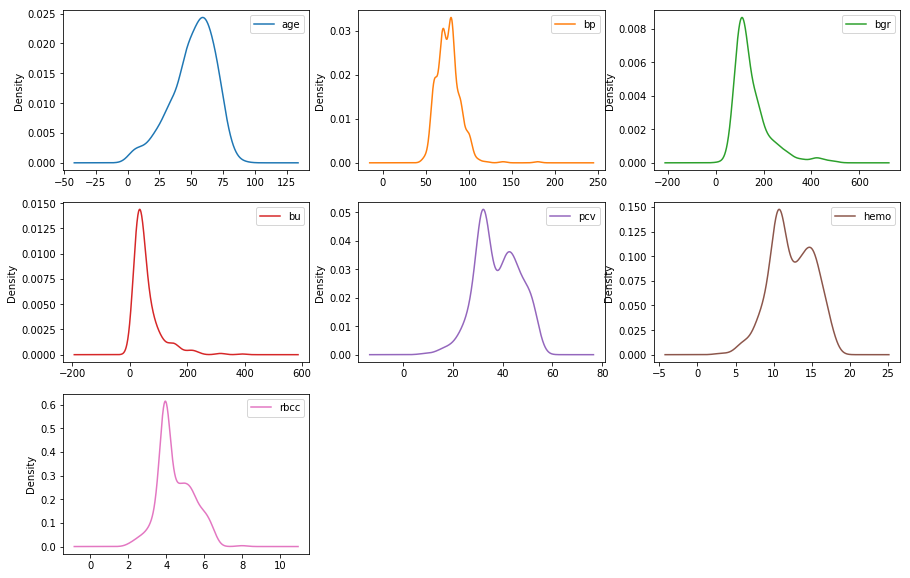

In [16]:
# Univariate Density Plots
data_num_w_class.plot(kind= 'density ' , subplots=True, layout=(3,3), sharex=False)
plt.show()

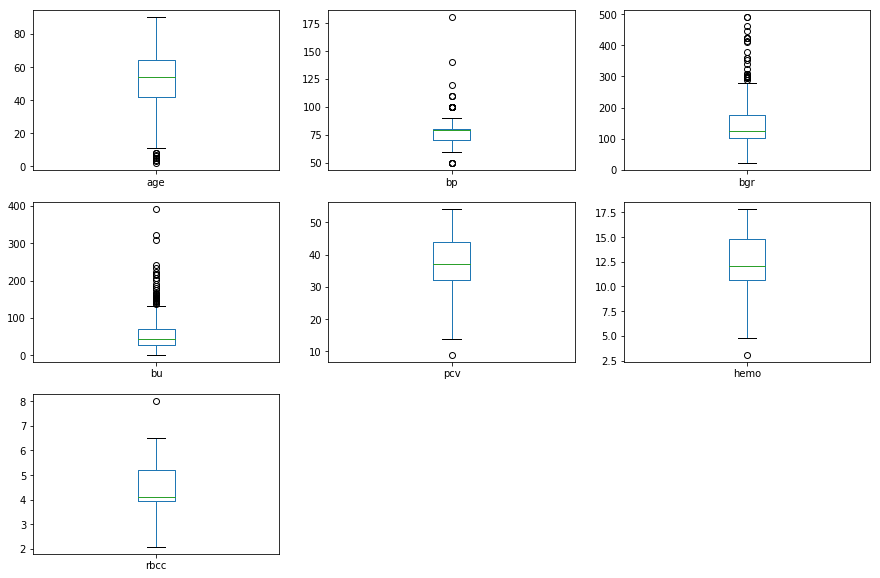

In [17]:
data_num_w_class.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [18]:
colors_palette = {"ckd": "red",  "notckd": "blue"}
colors = [colors_palette[c] for c in data_num_w_class['class']]   

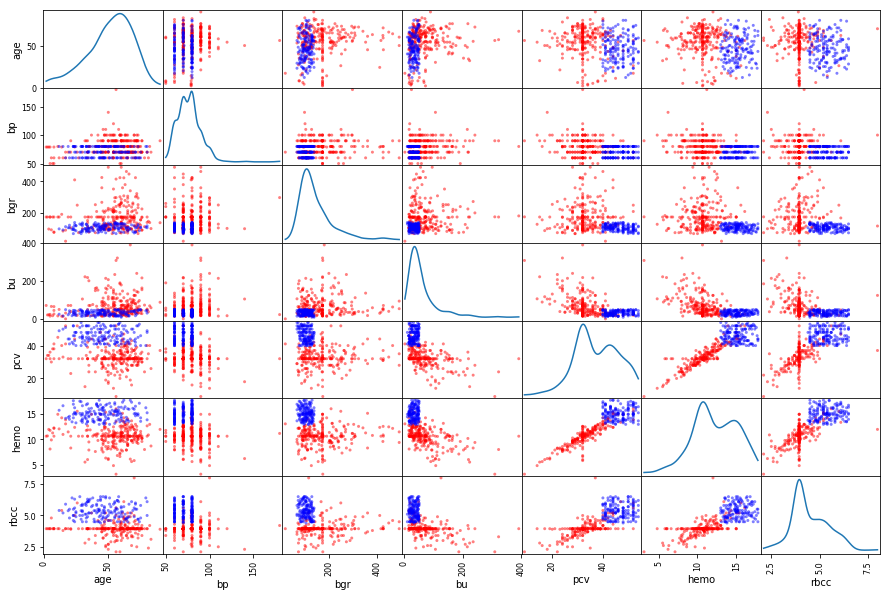

In [19]:
## red : ckd
## blue: notckd
from pandas.plotting import scatter_matrix
scatter_matrix(data_num_w_class, color=colors, diagonal='kde')
plt.show()

In [20]:
data_cleaned = pd.concat([data_num_w_class, data_cat_clean], axis=1)

In [21]:
# rearrange columns position to default
data_cleaned = data_cleaned[column]

In [22]:
data_cleaned.to_csv('chronic_kidney_disease_full_cleaned.csv', index=0)